In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('./datasets/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


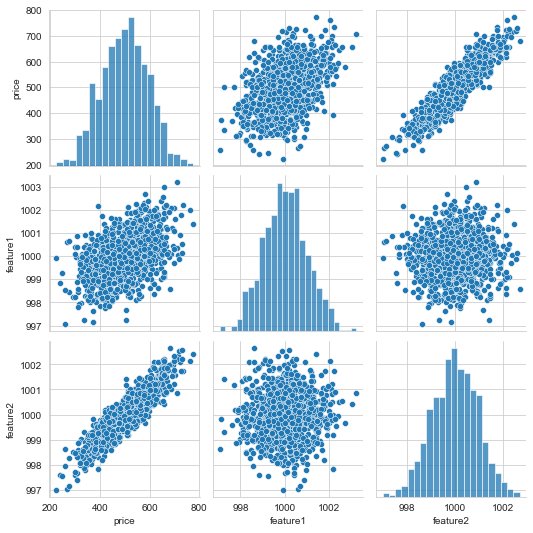

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(X_test)

(700, 300)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train = scaler.transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
# help(Sequential)

In [14]:
# model = Sequential([Dense(4, activation='relu'),
#                     Dense(2, activation='relu'),
#                     Dense(1)])

In [15]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [16]:
model.fit(x=X_train, y=y_train, epochs=250, verbose=0)

In [17]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

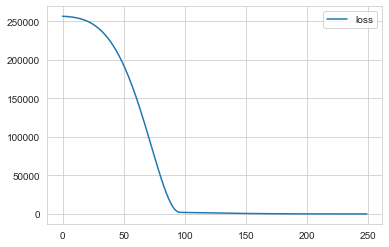

In [18]:
loss_df.plot()

In [20]:
model.evaluate(X_train, y_train, verbose=0)

24.054471969604492

In [21]:
model.evaluate(X_test, y_test, verbose=0)

24.96918487548828

In [22]:
preds = model.predict(X_test)

In [24]:
preds = pd.Series(preds.reshape(300,))
preds

0      405.110596
1      623.231079
2      591.823242
3      571.990601
4      366.541656
          ...    
295    528.828735
296    515.219788
297    609.342163
298    416.730743
299    410.724518
Length: 300, dtype: float32

In [25]:
preds_df = pd.DataFrame(y_test, columns=['Test True Y'])
preds_df = pd.concat([preds_df, preds], axis=1)

In [26]:
preds_df

,Test True Y,0
0,402.296319,405.110596
1,624.156198,623.231079
2,582.455066,591.823242
3,578.588606,571.990601
4,371.224104,366.541656
...,...,...
295,525.704657,528.828735
296,502.909473,515.219788
297,612.727910,609.342163
298,417.569725,416.730743


In [27]:
preds_df.columns = ['Test True Y', 'Model Predictions']
preds_df

,Test True Y,Model Predictions
0,402.296319,405.110596
1,624.156198,623.231079
2,582.455066,591.823242
3,578.588606,571.990601
4,371.224104,366.541656
...,...,...
295,525.704657,528.828735
296,502.909473,515.219788
297,612.727910,609.342163
298,417.569725,416.730743


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

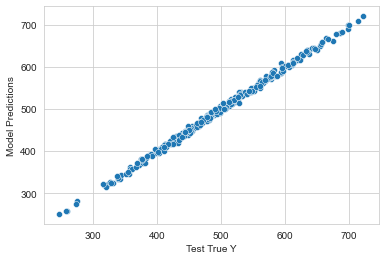

In [29]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=preds_df)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
mean_absolute_error(preds_df['Test True Y'], preds_df['Model Predictions'])

4.001667062918459

Only 4 dollar off from the mean `price`

In [32]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


Less than 1%, which is a very good model

In [33]:
mean_squared_error(preds_df['Test True Y'], preds_df['Model Predictions'])

24.96918930489426

In [34]:
np.sqrt(mean_squared_error(preds_df['Test True Y'], preds_df['Model Predictions']))

4.996917980605071

Say if we have a new data with features below

In [35]:
new_data_1 = [[998, 1000]] # feature1 & feature2

In [37]:
new_data_1 = scaler.transform(new_data_1)

In [38]:
model.predict(new_data_1)

array([[419.57455]], dtype=float32)

Save the model

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model.save('./others/tf-syntax-basic-model.h5')

In [41]:
later_model = load_model('./others/tf-syntax-basic-model.h5')

In [42]:
later_model.predict(new_data_1)

array([[419.57455]], dtype=float32)